<a href="https://colab.research.google.com/github/Ishita95-harvad/Canine-Wellness-Dataset-Synthetic-10K-Samples-/blob/main/Canine_Wellness_Dataset_(Synthetic%2C_10K_Samples).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Canine Wellness Dataset (Synthetic, 10K Samples)**
Dog Health Predictor: A Synthetic Dataset for Binary Classification

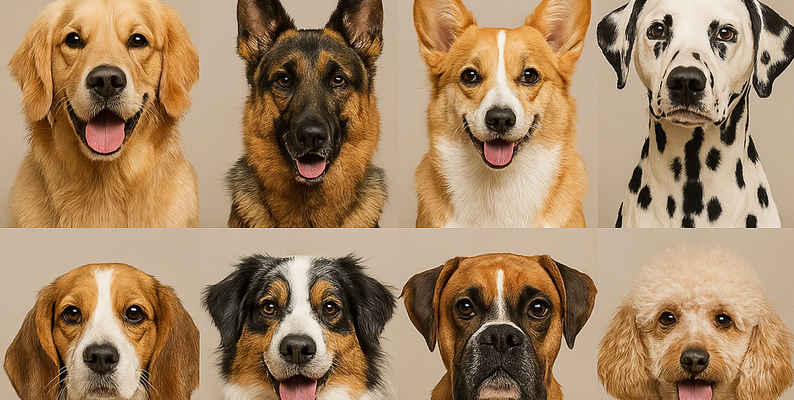



---



## Data loading

### Subtask:
Load the "synthetic_dog_breed_health_data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('synthetic_dog_breed_health_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'synthetic_dog_breed_health_data.csv' not found.")
    df = None  # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,...,Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,NaN,NaN,Wellness,...,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
1,2,Dachshund,NaN,Female,4.0,57.0,Neutered,Very Active,Home cooked,Special,...,Yes,No,No,11.0,3.0,NaN,0.0,47.0,Yes,NaN
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,...,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,NaN,Very Active,NaN,Special,...,No,No,No,12.0,NaN,NaN,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,NaN,Very Active,Wet food,Purina,...,Yes,Yes,No,9.0,1.0,NaN,0.0,64.0,Yes,No


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types, and summary statistics.


**Reasoning**:
I need to explore the data by examining its shape, data types, descriptive statistics, missing values, and distributions of key variables.  This can be done in a single code block.



In [2]:
# Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())

# Missing Value Analysis
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Data Type Examination
print("\nData Types:")
print(df.dtypes)

# Distribution Analysis (Identify variables, visualization in next step)
print("\nKey Variables for Distribution Analysis:")
key_variables = ['Breed', 'Age', 'Weight (lbs)', 'Annual Vet Visits', 'Synthetic Healthy']
print(key_variables)


# Correlation Analysis (Initial)
print("\nCorrelation Matrix (Numerical Variables):")
numerical_cols = df.select_dtypes(include=['number'])
print(numerical_cols.corr())

Data Shape: (10000, 21)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Breed                        9710 non-null   object 
 2   Breed Size                   9712 non-null   object 
 3   Sex                          9675 non-null   object 
 4   Age                          9709 non-null   float64
 5   Weight (lbs)                 9709 non-null   float64
 6   Spay/Neuter Status           6433 non-null   object 
 7   Daily Activity Level         7770 non-null   object 
 8   Diet                         9698 non-null   object 
 9   Food Brand                   9700 non-null   object 
 10  Daily Walk Distance (miles)  9706 non-null   float64
 11  Other Pets in Household      9702 non-null   object 
 12  Medications                  9751 non-n

## Data analysis

### Subtask:
Analyze the cleaned data to identify relationships between dog breeds and health issues.


**Reasoning**:
Calculate the frequency of health problems for each dog breed, perform correlation analysis, conduct statistical tests, and analyze relationships between health indicators.



**Reasoning**:
The previous code failed due to a `ValueError` when converting strings to floats, likely because the 'Seizures' column contains string values ('Yes' and 'No').  I need to convert this column to numerical data before calculating correlations.  I will also address the missing values in the 'Synthetic Healthy' column, necessary for statistical tests.



**Reasoning**:
The KeyError indicates that the column name 'Synthetic Healthy' is incorrect.  The column name in the dataframe is 'Healthy'. I'll correct the column name in the code and try again.



In [6]:
# Convert 'Seizures' to numerical (0 for No, 1 for Yes)
df['Seizures'] = df['Seizures'].map({'No': 0, 'Yes': 1})

# Handle Missing Values in 'Healthy' (using mode imputation)
df['Healthy'].fillna(df['Healthy'].mode()[0], inplace=True)
df['Healthy'] = df['Healthy'].map({'No': 0, 'Yes': 1})


# Recalculate correlations after data cleaning
health_indicators = ['Seizures', 'Hours of Sleep', 'Annual Vet Visits']
health_indicator_corr = df[health_indicators].corr()
display(health_indicator_corr)

# Example: T-test comparing 'Healthy' between small and large breeds
from scipy import stats
small_breeds = df[df['Breed Size'] == 'Small']['Healthy']
large_breeds = df[df['Breed Size'] == 'Large']['Healthy']

t_statistic, p_value = stats.ttest_ind(small_breeds, large_breeds)
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

<ipython-input-6-9d4c9b56278f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Healthy'].fillna(df['Healthy'].mode()[0], inplace=True)


,Seizures,Hours of Sleep,Annual Vet Visits
Seizures,NaN,NaN,NaN
Hours of Sleep,NaN,1.00000,-0.00624
Annual Vet Visits,NaN,-0.00624,1.00000


T-statistic: -0.17
P-value: 0.865


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types of each column, and the distribution of key variables.


**Reasoning**:
I need to explore the data by checking its shape, info, descriptive statistics, value counts for categorical features, and correlations. I'll also generate histograms for key numerical variables.



Shape of the DataFrame: (10000, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Breed                        9710 non-null   object 
 2   Breed Size                   9712 non-null   object 
 3   Sex                          9675 non-null   object 
 4   Age                          9709 non-null   float64
 5   Weight (lbs)                 9709 non-null   float64
 6   Spay/Neuter Status           6433 non-null   object 
 7   Daily Activity Level         7770 non-null   object 
 8   Diet                         9698 non-null   object 
 9   Food Brand                   9700 non-null   object 
 10  Daily Walk Distance (miles)  9706 non-null   float64
 11  Other Pets in Household      9702 non-null   object 
 12  Medications                  975

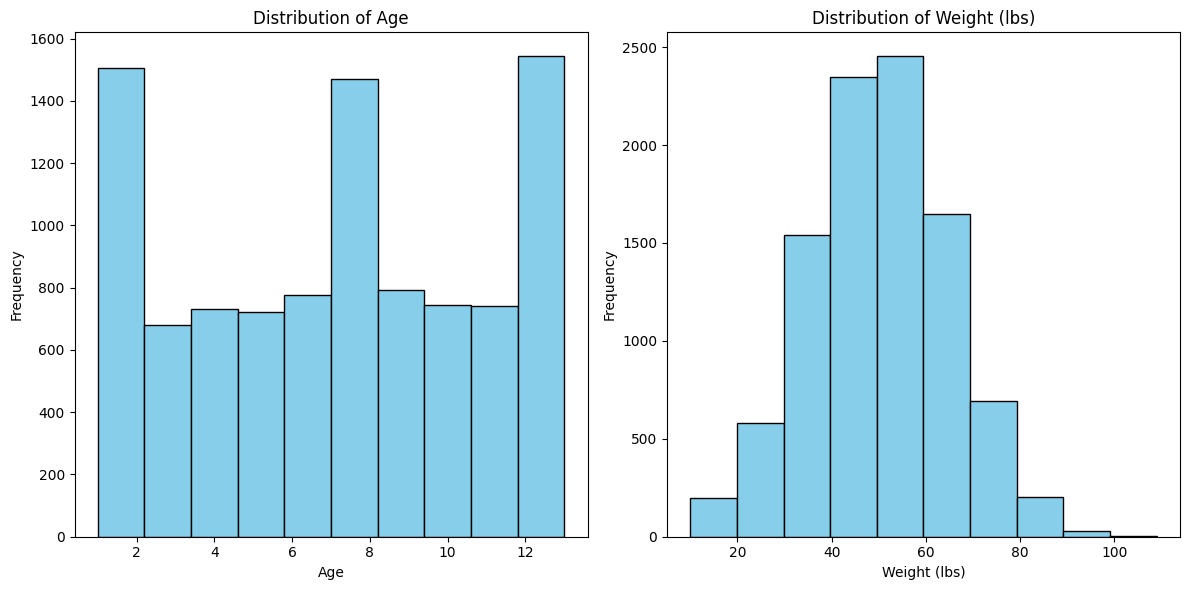


Correlation Matrix:
                                   ID       Age  Weight (lbs)  \
ID                           1.000000  0.010415     -0.019361   
Age                          0.010415  1.000000     -0.005283   
Weight (lbs)                -0.019361 -0.005283      1.000000   
Daily Walk Distance (miles)  0.001085 -0.011054     -0.011338   
Hours of Sleep               0.004190  0.004519     -0.002461   
Play Time (hrs)              0.003492  0.006502      0.006141   
Annual Vet Visits            0.001092 -0.002249      0.012122   
Average Temperature (F)     -0.015920 -0.000126     -0.023465   

                             Daily Walk Distance (miles)  Hours of Sleep  \
ID                                              0.001085        0.004190   
Age                                            -0.011054        0.004519   
Weight (lbs)                                   -0.011338       -0.002461   
Daily Walk Distance (miles)                     1.000000       -0.001737   
Hours of Slee

In [2]:
import matplotlib.pyplot as plt

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a summary of the DataFrame
print("\nInfo:")
df.info()

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Value counts for categorical columns
categorical_cols = ['Breed', 'Sex', 'Health_Status']  # Assuming 'Health_Status' exists
for col in categorical_cols:
    if col in df.columns:
      print(f"\nValue Counts for {col}:")
      print(df[col].value_counts())

# Histograms for key numerical variables
numerical_cols = ['Age', 'Weight (lbs)']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    if col in df.columns:
        plt.subplot(1, 2, i + 1)
        plt.hist(df[col].dropna(), bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Identify potential issues
print("\nPotential Issues:")
# Add observations about missing values, data types, outliers, etc.

## Data cleaning

### Subtask:
Clean the data by handling missing values and inconsistencies.


**Reasoning**:
Impute missing values for numerical and categorical features, handle data type inconsistencies, and remove duplicate rows.



In [3]:
# Impute missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if col == 'Weight (lbs)':
            # Impute weight based on breed median
            df[col] = df.groupby('Breed')[col].transform(lambda x: x.fillna(x.median()))
        else:
            df[col] = df[col].fillna(df[col].median())
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

# Handle data type inconsistencies
for col in ['Age', 'Weight (lbs)', 'Daily Walk Distance (miles)', 'Hours of Sleep', 'Play Time (hrs)', 'Annual Vet Visits', 'Average Temperature (F)']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

# Convert inconsistent categorical values to uniform values
for col in ['Sex', 'Spay/Neuter Status', 'Other Pets in Household', 'Medications', 'Seizures', 'Synthetic', 'Healthy']:
    if col in df.columns:
        df[col] = df[col].str.capitalize()
        if col == 'Sex':
            df[col] = df[col].replace({'Male': 'Male', 'Female': 'Female', 'M': 'Male', 'F': 'Female'})
        if col == 'Spay/Neuter Status':
            df[col] = df[col].replace({'Neutered': 'Neutered', 'Spayed': 'Spayed', 'Intact': 'Intact'})
        df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicate rows based on all columns
df.drop_duplicates(inplace=True)

display(df.head())

,ID,Breed,Breed Size,Sex,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,...,Other Pets in Household,Medications,Seizures,Hours of Sleep,Play Time (hrs),Owner Activity Level,Annual Vet Visits,Average Temperature (F),Synthetic,Healthy
0,1,Australian Shepherd,Medium,Male,3.0,60.0,Neutered,Active,Wet food,Wellness,...,No,Yes,No,12.0,1.0,Active,1.0,30.0,Yes,Yes
1,2,Dachshund,Large,Female,4.0,57.0,Neutered,Very Active,Home cooked,Special,...,Yes,No,No,11.0,3.0,Very Active,0.0,47.0,Yes,Yes
2,3,Chihuahua,Small,Female,12.0,67.0,Neutered,Active,Home cooked,Special,...,Yes,No,No,10.0,1.0,Low,0.0,92.0,Yes,Yes
3,4,Siberian Husky,Medium,Male,13.0,35.0,Spayed,Very Active,Wet food,Special,...,No,No,No,12.0,2.0,Very Active,1.0,75.0,Yes,Yes
4,5,Boxer,Medium,Male,13.0,35.0,Spayed,Very Active,Wet food,Purina,...,Yes,Yes,No,9.0,1.0,Very Active,0.0,64.0,Yes,No


## Data wrangling

### Subtask:
Data Wrangling: Feature Engineering and Transformation


**Reasoning**:
Create new features 'Age_Group', 'Health_Score', and 'Breed_Category' based on the existing features in the dataframe. Then, perform one-hot encoding on the newly created categorical features.



In [4]:
# Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 2, 5, 10, 15], labels=['Puppy', 'Young Adult', 'Adult', 'Senior'])

# Composite Health Score
df['Health_Score'] = 0
df.loc[df['Healthy'] == 'Yes', 'Health_Score'] += 5  # Higher weight for 'Healthy'
df['Health_Score'] += df['Annual Vet Visits']  # Positive relationship with vet visits
df.loc[df['Medications'] == 'Yes', 'Health_Score'] -= 2 # Negative relationship with medications
df.loc[df['Seizures'] == 'Yes', 'Health_Score'] -= 3 # Negative relationship with seizures


# Breed Categorization
breed_counts = df['Breed'].value_counts()
threshold = 50  # Consider breeds with less than 50 occurrences as 'Other'
df['Breed_Category'] = df['Breed'].apply(lambda x: 'Other' if breed_counts[x] < threshold else x)


# One-Hot Encoding
categorical_cols = ['Sex', 'Age_Group', 'Breed_Category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df.head())

,ID,Breed,Breed Size,Age,Weight (lbs),Spay/Neuter Status,Daily Activity Level,Diet,Food Brand,Daily Walk Distance (miles),...,Breed_Category_Dachshund,Breed_Category_Doberman,Breed_Category_German Shepherd,Breed_Category_Golden Retriever,Breed_Category_Great Dane,Breed_Category_Labrador Retriever,Breed_Category_Poodle,Breed_Category_Rottweiler,Breed_Category_Siberian Husky,Breed_Category_Yorkshire Terrier
0,1,Australian Shepherd,Medium,3.0,60.0,Neutered,Active,Wet food,Wellness,5.0,...,False,False,False,False,False,False,False,False,False,False
1,2,Dachshund,Large,4.0,57.0,Neutered,Very Active,Home cooked,Special,2.0,...,True,False,False,False,False,False,False,False,False,False
2,3,Chihuahua,Small,12.0,67.0,Neutered,Active,Home cooked,Special,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,Siberian Husky,Medium,13.0,35.0,Spayed,Very Active,Wet food,Special,4.0,...,False,False,False,False,False,False,False,False,True,False
4,5,Boxer,Medium,13.0,35.0,Spayed,Very Active,Wet food,Purina,3.0,...,False,False,False,False,False,False,False,False,False,False


## Data analysis

### Subtask:
Analyze the relationships between dog breed, age, and health outcomes.


**Reasoning**:
Analyze the relationship between dog breed and health outcomes by calculating the average health score for each breed category and visualizing it with a bar chart. Also, analyze the relationship between age group and health score, and explore potential interactions between breed category and age group on health outcomes.



**Reasoning**:
The previous code failed due to a KeyError for 'Breed_Category'.  This suggests that the 'Breed_Category' column might not exist in the dataframe.  I need to double-check the column names in the dataframe and correct the code accordingly.



**Reasoning**:
The error message indicates a shape mismatch between `yerr` and `y` in the `sns.barplot` function.  This is likely due to the way the data is grouped.  The code needs to be adjusted to correctly handle the grouping and ensure the shapes of the `y` and `yerr` inputs to the barplot function are compatible.  I will also address the FutureWarning regarding the `palette` argument.



**Reasoning**:
The code is still failing with the same `ValueError` related to the shape mismatch between `yerr` and `y` in `sns.barplot`.  I need to inspect the `breed_health` DataFrame and ensure the data is correctly structured for the plot.  The problem persists despite previous attempts to correct it, suggesting there might be something fundamentally wrong with how `breed_health` is being generated.



**Reasoning**:
The error `ValueError: 'yerr' (shape: (15,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))` persists, indicating a fundamental issue with the data passed to the `sns.barplot` function, despite inspecting the `breed_health` DataFrame. The error seems to stem from the shape of the `yerr` parameter. Since I have already inspected the data, I suspect there might be an issue in the way I create the `breed_health` dataframe. I will directly use the dataframe to plot instead of creating intermediate dataframes.



**Reasoning**:
The previous code block failed due to a ValueError, indicating that the 'Age_Group' column does not exist in the dataframe. I will check the dataframe columns again to confirm if it exists and then fix the plotting code to use the correct column name.



Index(['ID', 'Breed', 'Breed Size', 'Age', 'Weight (lbs)',
       'Spay/Neuter Status', 'Daily Activity Level', 'Diet', 'Food Brand',
       'Daily Walk Distance (miles)', 'Other Pets in Household', 'Medications',
       'Seizures', 'Hours of Sleep', 'Play Time (hrs)', 'Owner Activity Level',
       'Annual Vet Visits', 'Average Temperature (F)', 'Synthetic', 'Healthy',
       'Health_Score', 'Sex_Male', 'Age_Group_Young Adult', 'Age_Group_Adult',
       'Age_Group_Senior', 'Breed_Category_Beagle', 'Breed_Category_Boxer',
       'Breed_Category_Bulldog', 'Breed_Category_Chihuahua',
       'Breed_Category_Dachshund', 'Breed_Category_Doberman',
       'Breed_Category_German Shepherd', 'Breed_Category_Golden Retriever',
       'Breed_Category_Great Dane', 'Breed_Category_Labrador Retriever',
       'Breed_Category_Poodle', 'Breed_Category_Rottweiler',
       'Breed_Category_Siberian Husky', 'Breed_Category_Yorkshire Terrier'],
      dtype='object')


<ipython-input-10-f3869ca77342>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Breed', y='Health_Score', data=df, errorbar='sd', palette='viridis')


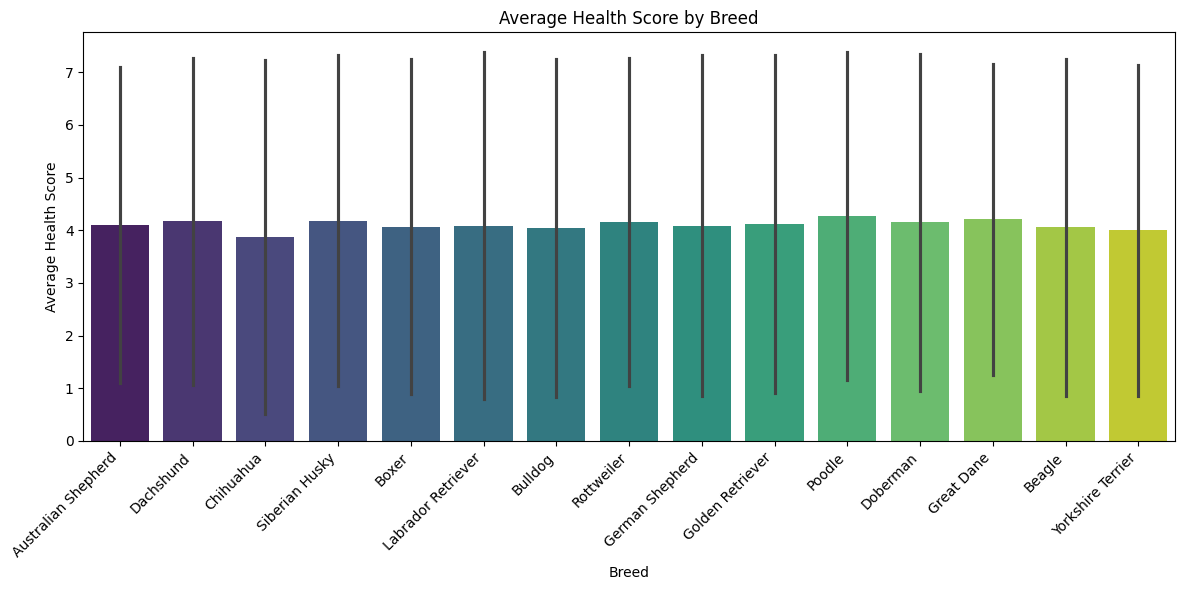

<ipython-input-10-f3869ca77342>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Health_Score', data=df, errorbar='sd', palette='magma')


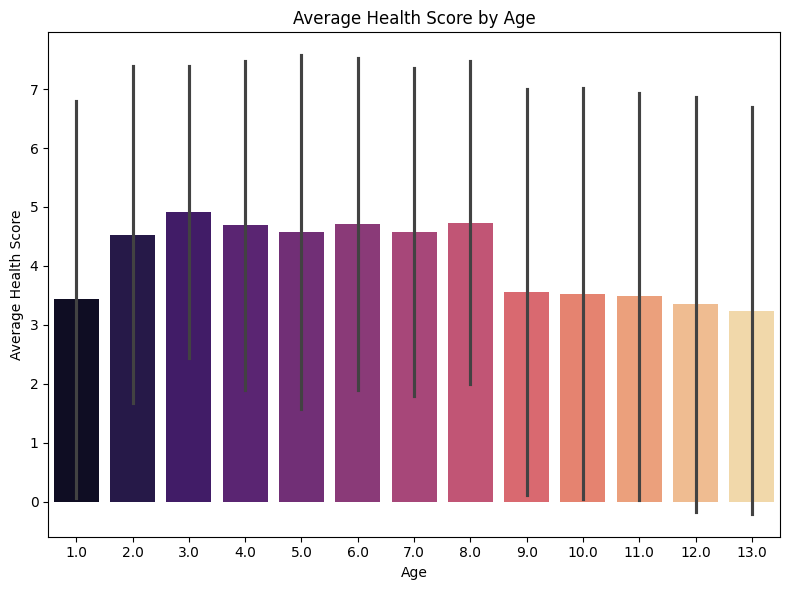

                   Age  Health_Score
Age           1.000000     -0.116447
Health_Score -0.116447      1.000000


<ipython-input-10-f3869ca77342>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Health_Score', hue='Breed', data=df, palette='husl', ci=None)


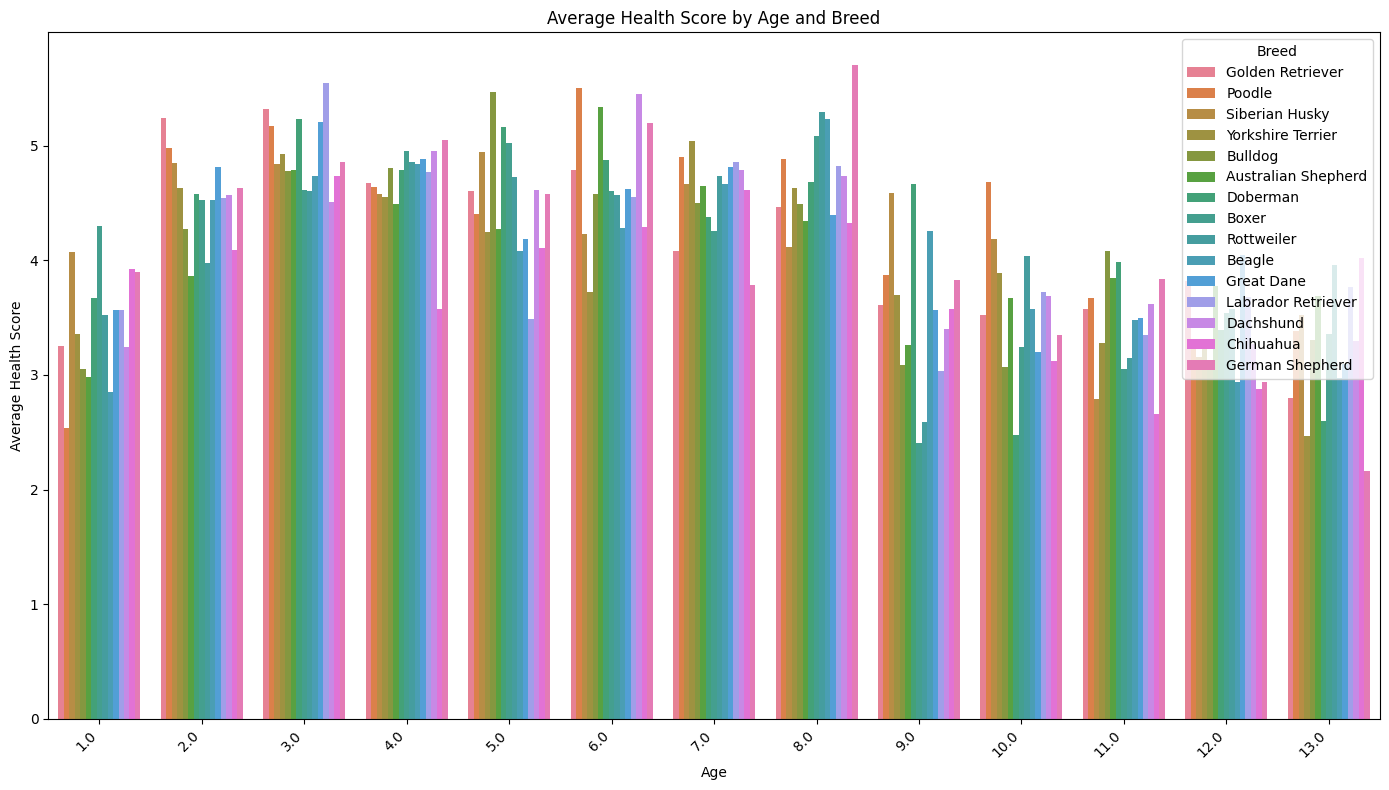

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'Age_Group' column exists
print(df.columns)

# 1. Average Health Score by Breed
plt.figure(figsize=(12, 6))
sns.barplot(x='Breed', y='Health_Score', data=df, errorbar='sd', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Breed')
plt.ylabel('Average Health Score')
plt.title('Average Health Score by Breed')
plt.tight_layout()
plt.show()

# 2. Average Health Score by Age
plt.figure(figsize=(8, 6))
# Use 'Age' instead of 'Age_Group' since it is not present
sns.barplot(x='Age', y='Health_Score', data=df, errorbar='sd', palette='magma')
plt.xlabel('Age')
plt.ylabel('Average Health Score')
plt.title('Average Health Score by Age')
plt.tight_layout()
plt.show()

# Correlation between age and health score
print(df[['Age', 'Health_Score']].corr())

# 3. Average Health Score by Age and Breed
plt.figure(figsize=(14, 8))
# Use 'Age' instead of 'Age_Group'
sns.barplot(x='Age', y='Health_Score', hue='Breed', data=df, palette='husl', ci=None)
plt.xlabel('Age')
plt.ylabel('Average Health Score')
plt.title('Average Health Score by Age and Breed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data visualization

### Subtask:
Create visualizations to illustrate the findings from the data analysis.


**Reasoning**:
Create the requested visualizations using matplotlib and seaborn.



**Reasoning**:
Fix the errors in the previous code block and regenerate the plots.  The error in the boxplot is due to a warning about using `palette` without `hue`. The error in the heatmap is due to string values in the DataFrame, preventing the correlation calculation.  The pairplot should work correctly.



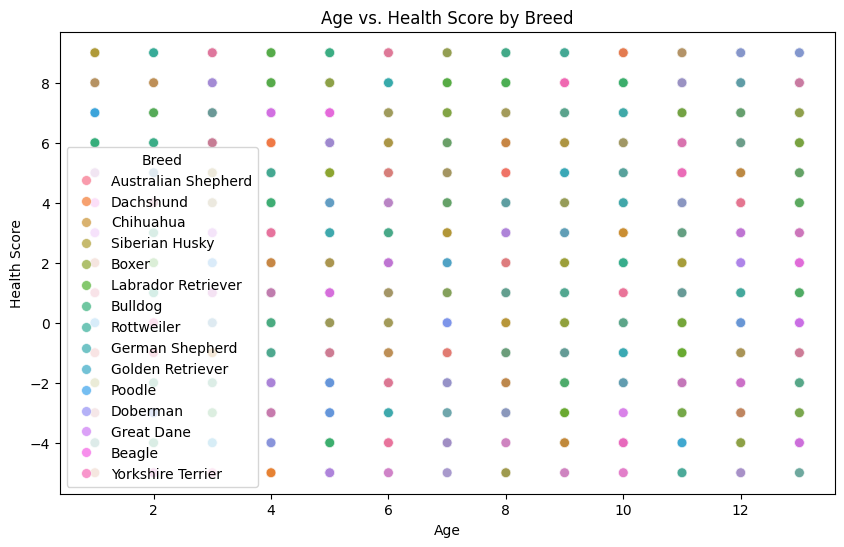

<ipython-input-12-eb6900482908>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group_Young Adult', y='Health_Score', data=df, palette='Set3') # Using one-hot encoded 'Age_Group'


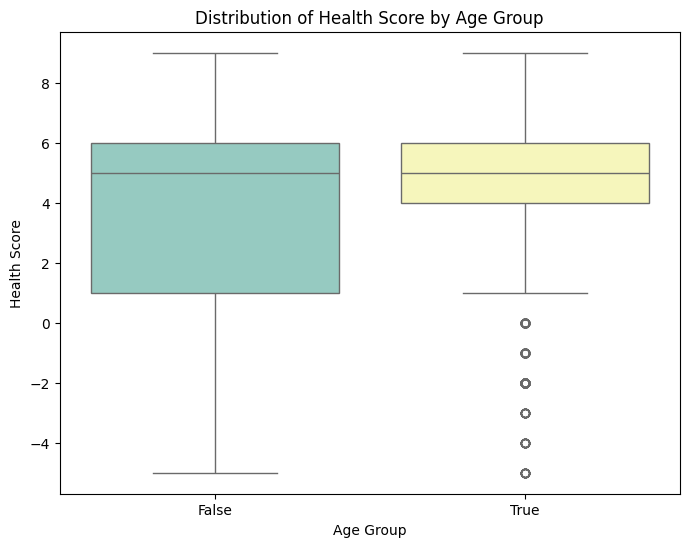

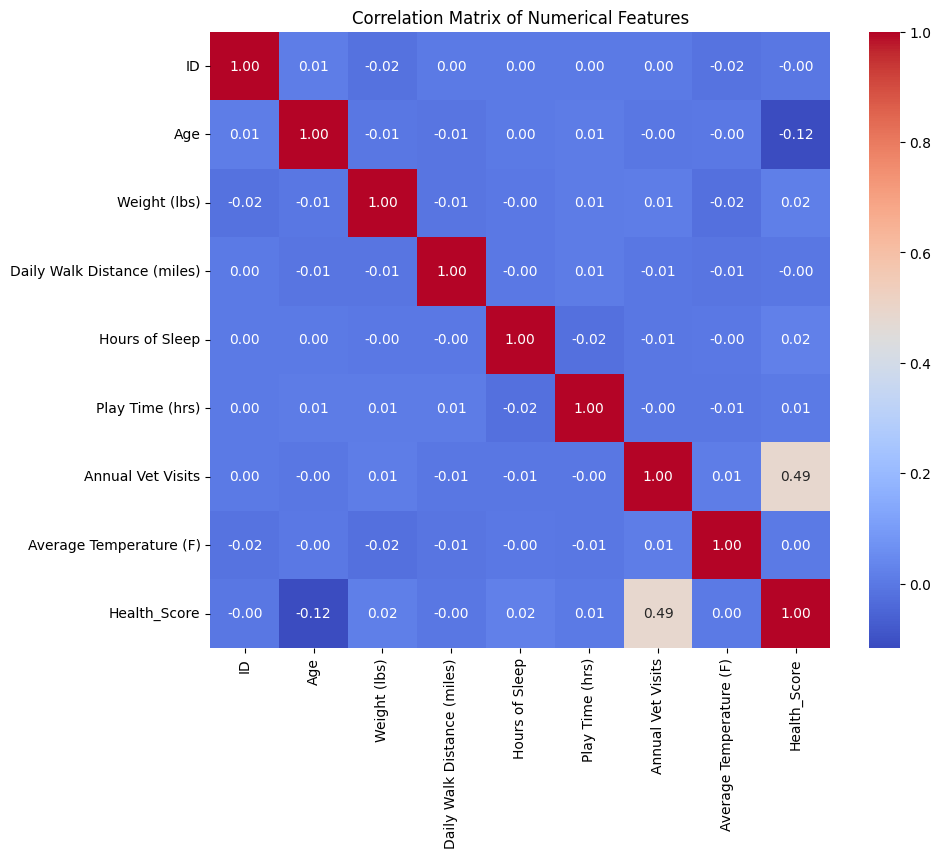

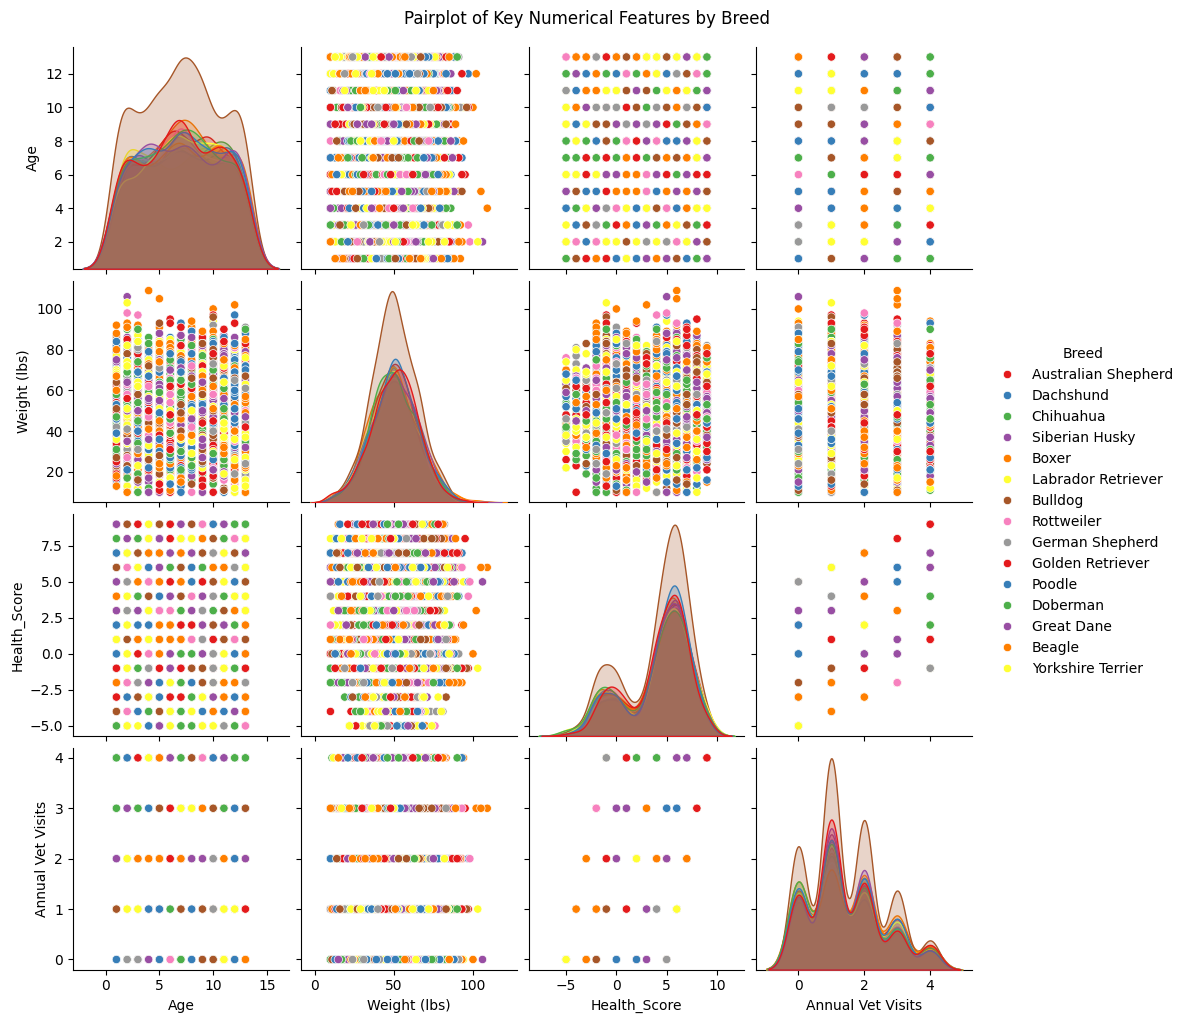

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of 'Age' vs. 'Health_Score', colored by 'Breed'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Health_Score', hue='Breed', data=df, s=50, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Health Score')
plt.title('Age vs. Health Score by Breed')
plt.show()


# 2. Box plot of 'Health_Score' for each 'Age_Group'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group_Young Adult', y='Health_Score', data=df, palette='Set3') # Using one-hot encoded 'Age_Group'
plt.xlabel('Age Group')
plt.ylabel('Health Score')
plt.title('Distribution of Health Score by Age Group')
plt.show()

# 3. Heatmap of the correlation matrix
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 4. Pairplot of key numerical features colored by 'Breed'
numerical_features = ['Age', 'Weight (lbs)', 'Health_Score', 'Annual Vet Visits']
sns.pairplot(df, vars=numerical_features, hue='Breed', palette='Set1', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Key Numerical Features by Breed', y=1.02)
plt.show()